In [207]:
!pip install yellowbrick  

Imports

In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import kde
import math
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import random
import warnings
warnings.filterwarnings('ignore')

load data

In [426]:
df = pd.read_csv('C:\\Users\\1381m\\pythonProject12\\behaviour.csv')

In [3]:
df.head()

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   2425083    49125             1          2                 18   
1   2425083    49125             1          2                 18   
2   2425083    49125             1          2                 18   
3   2425083    49125             1          2                 18   
4   2425083    49125             1          2                 18   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN          17                  1          0   
1                     NaN          91                  2          0   
2                     NaN          36                  3          0   
3                     NaN          83                  4          0   
4                     NaN          83                  5          0   

   department_id  department        product_name  
0             13      pantry  baking ingredients  
1             16  dairy eggs     soy lactosefree  
2             16  dairy eggs              butter  
3              4     produce    fresh vegetables  
4              4     produce    fresh vegetables

In [4]:
df

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0         2425083    49125             1          2                 18   
1         2425083    49125             1          2                 18   
2         2425083    49125             1          2                 18   
3         2425083    49125             1          2                 18   
4         2425083    49125             1          2                 18   
...           ...      ...           ...        ...                ...   
2019496   3390742   199430            16          3                 18   
2019497    458285   128787            42          2                 19   
2019498    458285   128787            42          2                 19   
2019499    458285   128787            42          2                 19   
2019500    458285   128787            42          2                 19   

         days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                           NaN          17                  1          0   
1                           NaN          91                  2          0   
2                           NaN          36                  3          0   
3                           NaN          83                  4          0   
4                           NaN          83                  5          0   
...                         ...         ...                ...        ...   
2019496                     5.0          83                  8          0   
2019497                     3.0         115                  1          1   
2019498                     3.0          32                  2          1   
2019499                     3.0          32                  3          1   
2019500                     3.0         123                  4          1   

         department_id  department                   product_name  
0                   13      pantry             baking ingredients  
1                   16  dairy eggs                soy lactosefree  
2                   16  dairy eggs                         butter  
3                    4     produce               fresh vegetables  
4                    4     produce               fresh vegetables  
...                ...         ...                            ...  
2019496              4     produce               fresh vegetables  
2019497              7   beverages  water seltzer sparkling water  
2019498              4     produce               packaged produce  
2019499              4     produce               packaged produce  
2019500              4     produce     packaged vegetables fruits  

[2019501 rows x 12 columns]

EDA

In [5]:
df.describe()

order_id       user_id  order_number     order_dow  \
count  2.019501e+06  2.019501e+06  2.019501e+06  2.019501e+06   
mean   1.707013e+06  1.030673e+05  1.715138e+01  2.735367e+00   
std    9.859832e+05  5.949117e+04  1.752576e+01  2.093882e+00   
min    1.000000e+01  2.000000e+00  1.000000e+00  0.000000e+00   
25%    8.526490e+05  5.158400e+04  5.000000e+00  1.000000e+00   
50%    1.705004e+06  1.026900e+05  1.100000e+01  3.000000e+00   
75%    2.559031e+06  1.546000e+05  2.400000e+01  5.000000e+00   
max    3.421080e+06  2.062090e+05  1.000000e+02  6.000000e+00   

       order_hour_of_day  days_since_prior_order    product_id  \
count       2.019501e+06            1.895159e+06  2.019501e+06   
mean        1.343948e+01            1.138603e+01  7.120590e+01   
std         4.241008e+00            8.970980e+00  3.820727e+01   
min         0.000000e+00            0.000000e+00  1.000000e+00   
25%         1.000000e+01            5.000000e+00  3.100000e+01   
50%         1.300000e+01            8.000000e+00  8.300000e+01   
75%         1.600000e+01            1.500000e+01  1.070000e+02   
max         2.300000e+01            3.000000e+01  1.340000e+02   

       add_to_cart_order     reordered  department_id  
count       2.019501e+06  2.019501e+06   2.019501e+06  
mean        8.363173e+00  5.897427e-01   9.928349e+00  
std         7.150059e+00  4.918804e-01   6.282933e+00  
min         1.000000e+00  0.000000e+00   1.000000e+00  
25%         3.000000e+00  0.000000e+00   4.000000e+00  
50%         6.000000e+00  1.000000e+00   9.000000e+00  
75%         1.100000e+01  1.000000e+00   1.600000e+01  
max         1.370000e+02  1.000000e+00   2.100000e+01

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [7]:
df.nunique()

order_id                  200000
user_id                   105273
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
dtype: int64

In [8]:
df.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

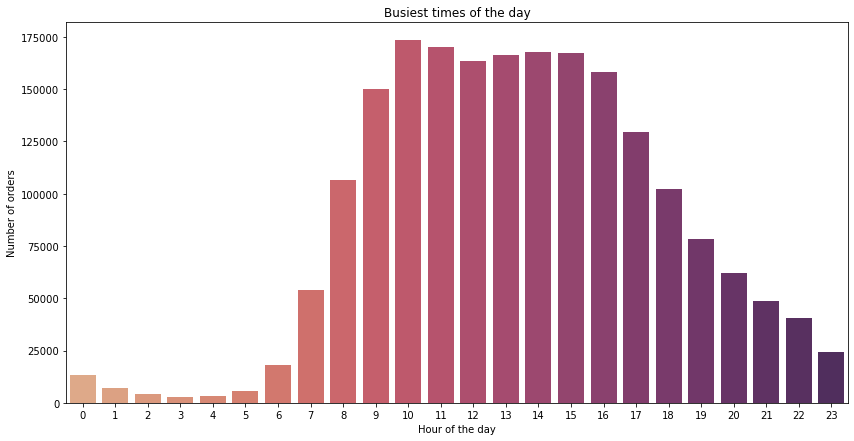

In [9]:
plt.figure(figsize = (14,7))
sns.countplot(data=df, x=df['order_hour_of_day'], palette = 'flare')
plt.title("Busiest times of the day")
plt.xlabel("Hour of the day")
plt.ylabel("Number of orders")
plt.show()

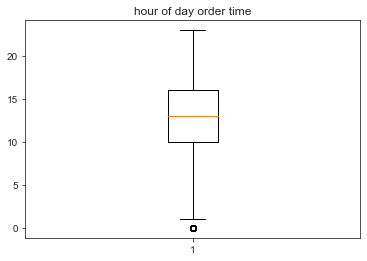

In [154]:
fig, ax = plt.subplots()
ax.set_title('hour of day order time')
ax.boxplot(df['order_hour_of_day'])

plt.show()

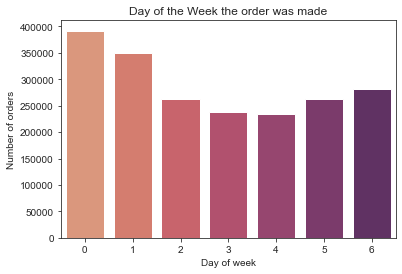

In [156]:
sns.countplot(data=df, x=df['order_dow'], palette = 'flare')
plt.title("Day of the Week the order was made")
plt.xlabel("Day of week")
plt.ylabel("Number of orders")
plt.show()

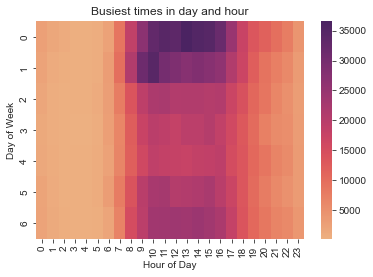

In [163]:
pivot = df.pivot_table(values='order_id', index='order_dow', columns='order_hour_of_day', aggfunc='count')
sns.heatmap(pivot, cmap='flare')
plt.title("Busiest times in day and hour")
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

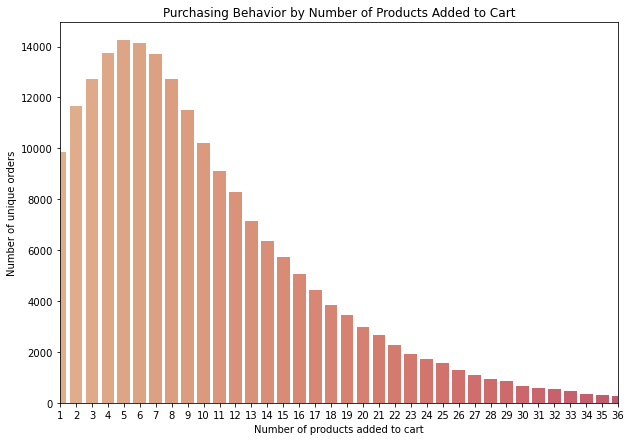

In [11]:
grouped = df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()

_, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x=grouped.index, y=grouped.values, ax=ax, palette='flare')
plt.ylabel('Number of unique orders')
plt.xlabel('Number of products added to cart')
plt.title('Purchasing Behavior by Number of Products Added to Cart')
plt.xlim(0, 35)
plt.show()

In [9]:
df

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0         2425083    49125             1          2                 18   
1         2425083    49125             1          2                 18   
2         2425083    49125             1          2                 18   
3         2425083    49125             1          2                 18   
4         2425083    49125             1          2                 18   
...           ...      ...           ...        ...                ...   
2019496   3390742   199430            16          3                 18   
2019497    458285   128787            42          2                 19   
2019498    458285   128787            42          2                 19   
2019499    458285   128787            42          2                 19   
2019500    458285   128787            42          2                 19   

         days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                           NaN          17                  1          0   
1                           NaN          91                  2          0   
2                           NaN          36                  3          0   
3                           NaN          83                  4          0   
4                           NaN          83                  5          0   
...                         ...         ...                ...        ...   
2019496                     5.0          83                  8          0   
2019497                     3.0         115                  1          1   
2019498                     3.0          32                  2          1   
2019499                     3.0          32                  3          1   
2019500                     3.0         123                  4          1   

         department_id  department                   product_name  
0                   13      pantry             baking ingredients  
1                   16  dairy eggs                soy lactosefree  
2                   16  dairy eggs                         butter  
3                    4     produce               fresh vegetables  
4                    4     produce               fresh vegetables  
...                ...         ...                            ...  
2019496              4     produce               fresh vegetables  
2019497              7   beverages  water seltzer sparkling water  
2019498              4     produce               packaged produce  
2019499              4     produce               packaged produce  
2019500              4     produce     packaged vegetables fruits  

[2019501 rows x 12 columns]

In [427]:
def order_time(x):
    if x in [6,7,8,9,10,11,12]:
        return 'The order was made in the morning'
    if x in [13,14,15,16,17]:
        return 'The order was made in the afternoon'
    if x in [18,19,20,21,22]:
        return 'The order was made in the evening'
    if x in [23,24,0,1,2,3,4,5]:
        return 'The order was made at night'
    return x

In [428]:
df['order_time_list']=df['order_hour_of_day'].apply(order_time)


In [15]:
df

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0         2425083    49125             1          2                 18   
1         2425083    49125             1          2                 18   
2         2425083    49125             1          2                 18   
3         2425083    49125             1          2                 18   
4         2425083    49125             1          2                 18   
...           ...      ...           ...        ...                ...   
2019496   3390742   199430            16          3                 18   
2019497    458285   128787            42          2                 19   
2019498    458285   128787            42          2                 19   
2019499    458285   128787            42          2                 19   
2019500    458285   128787            42          2                 19   

         days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                           NaN          17                  1          0   
1                           NaN          91                  2          0   
2                           NaN          36                  3          0   
3                           NaN          83                  4          0   
4                           NaN          83                  5          0   
...                         ...         ...                ...        ...   
2019496                     5.0          83                  8          0   
2019497                     3.0         115                  1          1   
2019498                     3.0          32                  2          1   
2019499                     3.0          32                  3          1   
2019500                     3.0         123                  4          1   

         department_id  department                   product_name  \
0                   13      pantry             baking ingredients   
1                   16  dairy eggs                soy lactosefree   
2                   16  dairy eggs                         butter   
3                    4     produce               fresh vegetables   
4                    4     produce               fresh vegetables   
...                ...         ...                            ...   
2019496              4     produce               fresh vegetables   
2019497              7   beverages  water seltzer sparkling water   
2019498              4     produce               packaged produce   
2019499              4     produce               packaged produce   
2019500              4     produce     packaged vegetables fruits   

                           order_time_list  
0        The order was made in the evening  
1        The order was made in the evening  
2        The order was made in the evening  
3        The order was made in the evening  
4        The order was made in the evening  
...                                    ...  
2019496  The order was made in the evening  
2019497  The order was made in the evening  
2019498  The order was made in the evening  
2019499  The order was made in the evening  
2019500  The order was made in the evening  

[2019501 rows x 13 columns]

In [24]:
df['order_time_list'].value_counts()

The order was made in the morning      836546
The order was made in the afternoon    788994
The order was made in the evening      332661
The order was made at night             61300
Name: order_time_list, dtype: int64

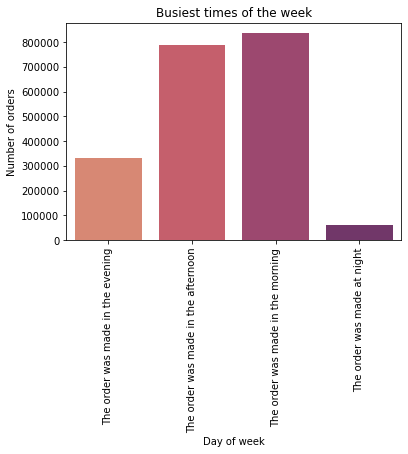

In [20]:
sns.countplot(data=df, x=df['order_time_list'], palette = 'flare')
plt.title("Busiest time interval of day")
plt.xlabel("interval")
plt.xticks(rotation='vertical')
plt.ylabel("Number of orders")
plt.show()

In [429]:
df['days_since_prior_order'].fillna(-1,inplace=True) 

In [26]:
df['days_since_prior_order'].value_counts()

 7.0     214126
 30.0    210814
 6.0     155685
 5.0     129089
 4.0     126250
-1.0     124342
 8.0     118722
 3.0     113263
 2.0      88737
 9.0      75120
 14.0     63414
 10.0     62073
 1.0      59200
 13.0     52204
 11.0     51476
 12.0     48171
 15.0     41531
 16.0     28632
 21.0     28359
 0.0      27673
 17.0     23921
 20.0     23234
 18.0     22777
 19.0     20140
 22.0     19950
 28.0     16459
 23.0     13779
 24.0     12833
 27.0     12804
 25.0     11832
 29.0     11590
 26.0     11301
Name: days_since_prior_order, dtype: int64

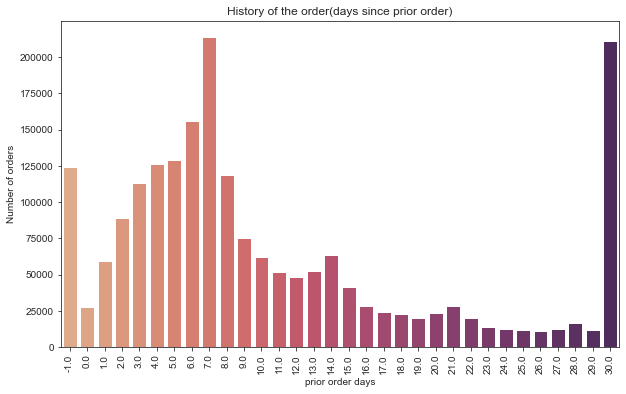

<Figure size 720x504 with 0 Axes>

In [176]:
plt.figure(figsize = (10,6))
sns.countplot(data=df, x=df['days_since_prior_order'], palette = 'flare')
plt.title("History of the order(days since prior order)")
plt.xlabel("prior order days")
plt.xticks(rotation='vertical')
plt.ylabel("Number of orders")
plt.figure(figsize = (10,7))
plt.show()

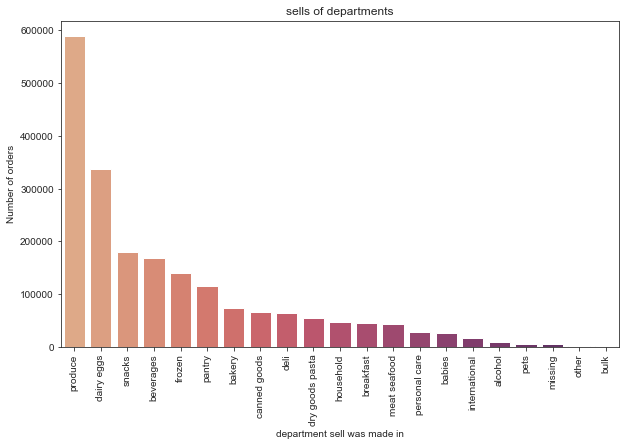

In [177]:
plt.figure(figsize = (10,6))
sns.countplot(data=df, x=df['department'], palette = 'flare', order = df['department'].value_counts().index)
plt.title("sells of departments")
plt.xlabel("department sell was made in")
plt.xticks(rotation='vertical')
plt.ylabel("Number of orders")
plt.show()

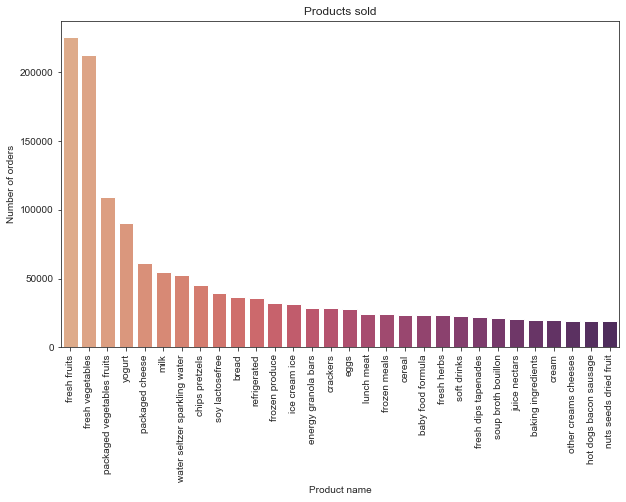

In [179]:
plt.figure(figsize = (10,6))
sns.countplot(data=df, x=df['product_name'], palette = 'flare', order = df['product_name'].value_counts().iloc[:30].index)
plt.title("Products sold")
plt.xlabel("Product name")
plt.xticks(rotation='vertical')
plt.ylabel("Number of orders")
plt.show()

In [45]:
df['reordered'].value_counts()

1    1190986
0     828515
Name: reordered, dtype: int64

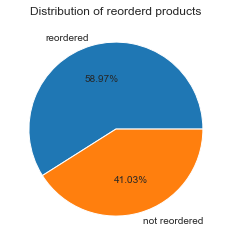

In [186]:
data = df['reordered'].value_counts()
keys = ['reordered', 'not reordered']

plt.pie(data, labels=keys, autopct='%1.2f%%')
plt.title('Distribution of reorderd products')

plt.show() 

In [99]:
 df.groupby(["department", 'reordered']).get_group(('alcohol', 1))
    

order_id  user_id  order_number  order_dow  order_hour_of_day  \
304        414169    88200            10          4                 18   
309        414169    88200            10          4                 18   
518       2957211    96947            61          3                 10   
519       2957211    96947            61          3                 10   
2255       426161    40846             7          1                 17   
...           ...      ...           ...        ...                ...   
2018802   1564414    44697             4          4                 10   
2018803   1564414    44697             4          4                 10   
2018804   1564414    44697             4          4                 10   
2018805   1564414    44697             4          4                 10   
2019319   2621419   193797             8          6                 15   

         days_since_prior_order  product_id  add_to_cart_order  reordered  \
304                         8.0          27                  1          1   
309                         8.0          27                  6          1   
518                         3.0          27                  2          1   
519                         3.0         124                  3          1   
2255                        4.0         124                  5          1   
...                         ...         ...                ...        ...   
2018802                     7.0          27                  2          1   
2018803                     7.0          27                  3          1   
2018804                     7.0          27                  4          1   
2018805                     7.0          27                  5          1   
2019319                     7.0         124                  5          1   

         department_id department   product_name  \
304                  5    alcohol  beers coolers   
309                  5    alcohol  beers coolers   
518                  5    alcohol  beers coolers   
519                  5    alcohol        spirits   
2255                 5    alcohol        spirits   
...                ...        ...            ...   
2018802              5    alcohol  beers coolers   
2018803              5    alcohol  beers coolers   
2018804              5    alcohol  beers coolers   
2018805              5    alcohol  beers coolers   
2019319              5    alcohol        spirits   

                             order_time_list  
304        The order was made in the evening  
309        The order was made in the evening  
518        The order was made in the morning  
519        The order was made in the morning  
2255     The order was made in the afternoon  
...                                      ...  
2018802    The order was made in the morning  
2018803    The order was made in the morning  
2018804    The order was made in the morning  
2018805    The order was made in the morning  
2019319  The order was made in the afternoon  

[5264 rows x 13 columns]

<AxesSubplot:title={'center':'Reordered products departments with order of more reordered ratio'}, xlabel='department'>

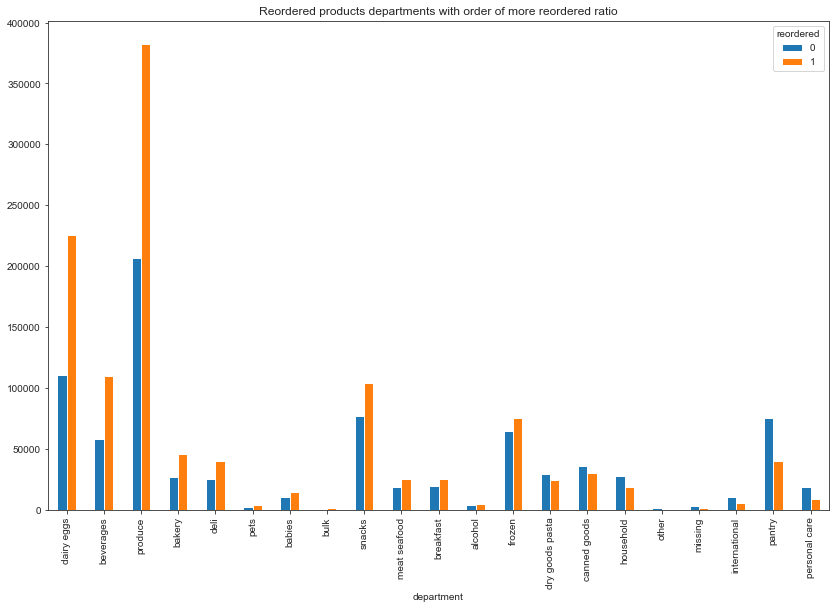

In [184]:
table = df.pivot_table(index='department', columns='reordered', values='user_id', aggfunc=['count'])

table['per'] = (table[('count', 1)] / table[('count', 0)] * 100).astype(int)
table = table.sort_values(by='per', ascending=False)
table['count'].plot(kind='bar', title='Reordered products departments with order of more reordered ratio', figsize=(14,9))


<AxesSubplot:title={'center':'Reordered products with order of more reordered ratio'}, xlabel='product_name'>

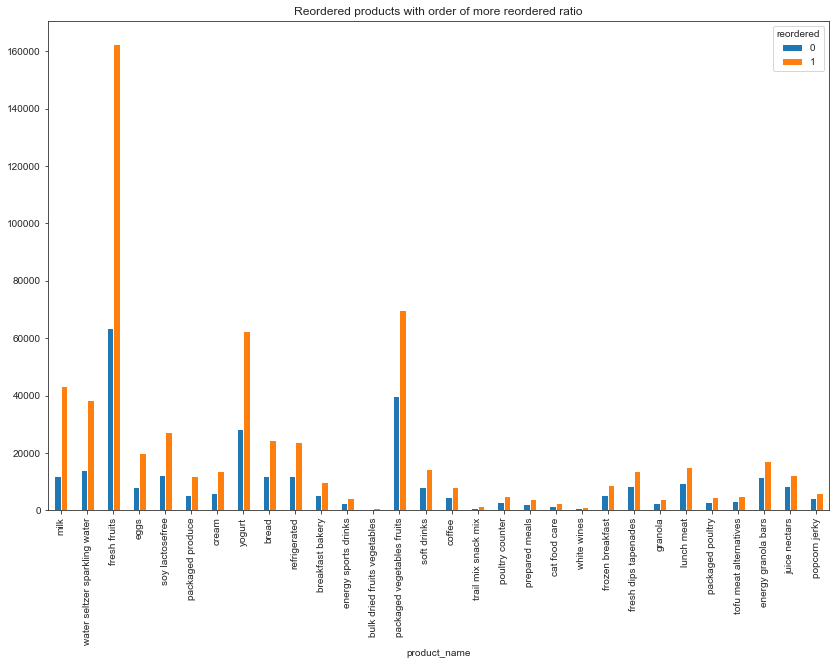

In [185]:
table = df.pivot_table(index='product_name', columns='reordered', values='user_id', aggfunc=['count'])

table['per'] = (table[('count', 1)] / table[('count', 0)] * 100).astype(int)
table = table.sort_values(by='per', ascending=False)[:30]
table['count'].plot(kind='bar', title='Reordered products with order of more reordered ratio', figsize=(14,9))


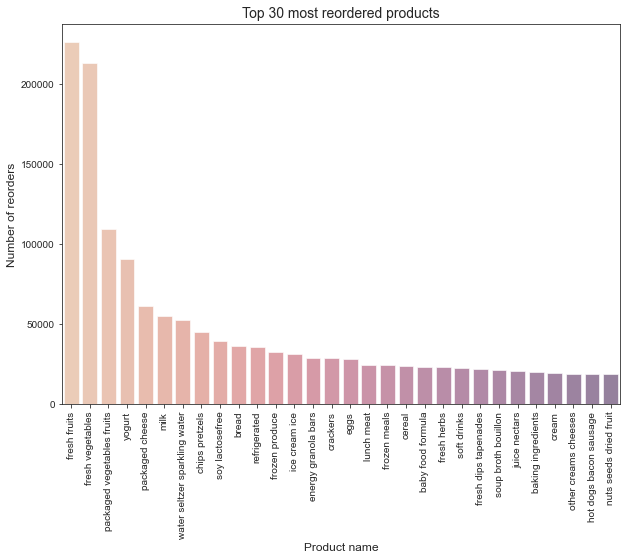

In [183]:
product_reordered_df = df.groupby('product_name')['reordered'].count().reset_index().sort_values(by='reordered', ascending=False)
product_reordered_df
plt.figure(figsize = (10,7))
sns.set_style("ticks")
sns.barplot(data=product_reordered_df.head(30), y="reordered", x="product_name", palette = 'flare', alpha=0.6)
plt.title("Top 30 most reordered products", fontsize=14)
plt.xlabel("Product name", fontsize=12)
plt.xticks(rotation='vertical')
plt.ylabel("Number of reorders", fontsize=12)
plt.show()

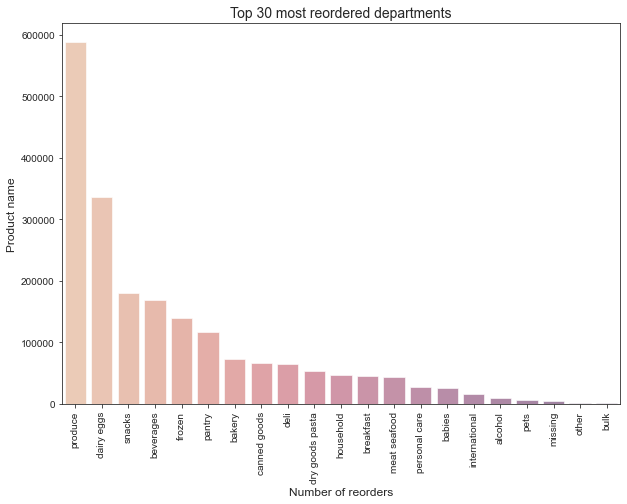

In [182]:
product_reordered_df = df.groupby('department')['reordered'].count().reset_index().sort_values(by='reordered', ascending=False)
product_reordered_df
plt.figure(figsize = (10,7))
sns.set_style("ticks")
sns.barplot(data=product_reordered_df.head(30), y="reordered", x="department", palette = 'flare', alpha=0.6)
plt.title("Top 30 most reordered departments", fontsize=14)
plt.xlabel("Product department", fontsize=12)
plt.xticks(rotation='vertical')
plt.ylabel("Number of reorders", fontsize=12)
plt.show()

In [430]:
df_2=df.copy()


In [431]:
df_2.drop(['department', 'product_name'], axis = 1, inplace = True)
df_2['order_time_list']=pd.factorize(df_2.order_time_list)[0]


In [203]:
df_2

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0         2425083    49125             1          2                 18   
1         2425083    49125             1          2                 18   
2         2425083    49125             1          2                 18   
3         2425083    49125             1          2                 18   
4         2425083    49125             1          2                 18   
...           ...      ...           ...        ...                ...   
2019496   3390742   199430            16          3                 18   
2019497    458285   128787            42          2                 19   
2019498    458285   128787            42          2                 19   
2019499    458285   128787            42          2                 19   
2019500    458285   128787            42          2                 19   

         days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                          -1.0          17                  1          0   
1                          -1.0          91                  2          0   
2                          -1.0          36                  3          0   
3                          -1.0          83                  4          0   
4                          -1.0          83                  5          0   
...                         ...         ...                ...        ...   
2019496                     5.0          83                  8          0   
2019497                     3.0         115                  1          1   
2019498                     3.0          32                  2          1   
2019499                     3.0          32                  3          1   
2019500                     3.0         123                  4          1   

         department_id  
0                   13  
1                   16  
2                   16  
3                    4  
4                    4  
...                ...  
2019496              4  
2019497              7  
2019498              4  
2019499              4  
2019500              4  

[2019501 rows x 10 columns]

In [198]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
 12  order_time_list         int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 200.3+ MB


Text(0.5, 1.0, 'features corrilation')

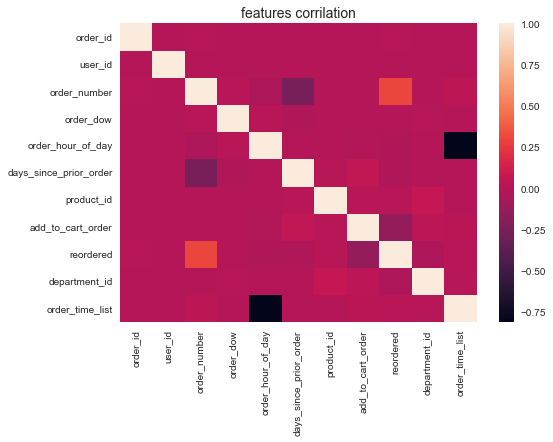

In [432]:
sns.heatmap(df_2.corr())
plt.title("features corrilation", fontsize=14)


In [433]:
df_2.drop(['order_time_list'], axis = 1, inplace = True)


Text(0.5, 1.0, 'features corrilation')

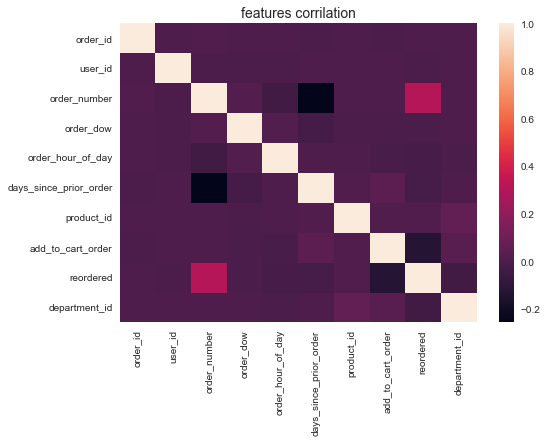

In [434]:
sns.heatmap(df_2.corr())
plt.title("features corrilation", fontsize=14)


model

In [266]:
df

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0         2425083    49125             1          2                 18   
1         2425083    49125             1          2                 18   
2         2425083    49125             1          2                 18   
3         2425083    49125             1          2                 18   
4         2425083    49125             1          2                 18   
...           ...      ...           ...        ...                ...   
2019496   3390742   199430            16          3                 18   
2019497    458285   128787            42          2                 19   
2019498    458285   128787            42          2                 19   
2019499    458285   128787            42          2                 19   
2019500    458285   128787            42          2                 19   

         days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                          -1.0          17                  1          0   
1                          -1.0          91                  2          0   
2                          -1.0          36                  3          0   
3                          -1.0          83                  4          0   
4                          -1.0          83                  5          0   
...                         ...         ...                ...        ...   
2019496                     5.0          83                  8          0   
2019497                     3.0         115                  1          1   
2019498                     3.0          32                  2          1   
2019499                     3.0          32                  3          1   
2019500                     3.0         123                  4          1   

         department_id  department                   product_name  \
0                   13      pantry             baking ingredients   
1                   16  dairy eggs                soy lactosefree   
2                   16  dairy eggs                         butter   
3                    4     produce               fresh vegetables   
4                    4     produce               fresh vegetables   
...                ...         ...                            ...   
2019496              4     produce               fresh vegetables   
2019497              7   beverages  water seltzer sparkling water   
2019498              4     produce               packaged produce   
2019499              4     produce               packaged produce   
2019500              4     produce     packaged vegetables fruits   

                           order_time_list  
0        The order was made in the evening  
1        The order was made in the evening  
2        The order was made in the evening  
3        The order was made in the evening  
4        The order was made in the evening  
...                                    ...  
2019496  The order was made in the evening  
2019497  The order was made in the evening  
2019498  The order was made in the evening  
2019499  The order was made in the evening  
2019500  The order was made in the evening  

[2019501 rows x 13 columns]

In [273]:
data = df_2.drop(['order_id', 'user_id'], axis = 1)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [281]:
df = pd.DataFrame(data_scaled)
df

0         1         2         3         4         5         6  \
0       -0.921579 -0.351198  1.075339 -1.265304 -1.418733 -1.029806 -1.198956   
1       -0.921579 -0.351198  1.075339 -1.265304  0.518072 -0.889947 -1.198956   
2       -0.921579 -0.351198  1.075339 -1.265304 -0.921445 -0.750088 -1.198956   
3       -0.921579 -0.351198  1.075339 -1.265304  0.308687 -0.610229 -1.198956   
4       -0.921579 -0.351198  1.075339 -1.265304  0.308687 -0.470370 -1.198956   
...           ...       ...       ...       ...       ...       ...       ...   
2019496 -0.065696  0.126384  1.075339 -0.612155  0.308687 -0.050793 -1.198956   
2019497  1.417834 -0.351198  1.311132 -0.829871  1.146224 -1.029806  0.834059   
2019498  1.417834 -0.351198  1.311132 -0.829871 -1.026137 -0.889947  0.834059   
2019499  1.417834 -0.351198  1.311132 -0.829871 -1.026137 -0.750088  0.834059   
2019500  1.417834 -0.351198  1.311132 -0.829871  1.355609 -0.610229  0.834059   

                7  
0        0.488888  
1        0.966372  
2        0.966372  
3       -0.943564  
4       -0.943564  
...           ...  
2019496 -0.943564  
2019497 -0.466080  
2019498 -0.943564  
2019499 -0.943564  
2019500 -0.943564  

[2019501 rows x 8 columns]

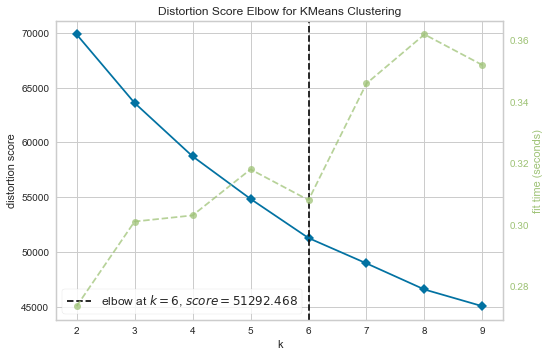

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [282]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(df.sample(10000))
visualizer.show()

2
For n_clusters = 2 The average silhouette_score is : 0.15114843036551956
3
For n_clusters = 3 The average silhouette_score is : 0.12023600801731445
4
For n_clusters = 4 The average silhouette_score is : 0.13756220952608172
5
For n_clusters = 5 The average silhouette_score is : 0.11989732054857409
6
For n_clusters = 6 The average silhouette_score is : 0.13149214997672407
7
For n_clusters = 7 The average silhouette_score is : 0.13160206200122093
8
For n_clusters = 8 The average silhouette_score is : 0.13095825607745148


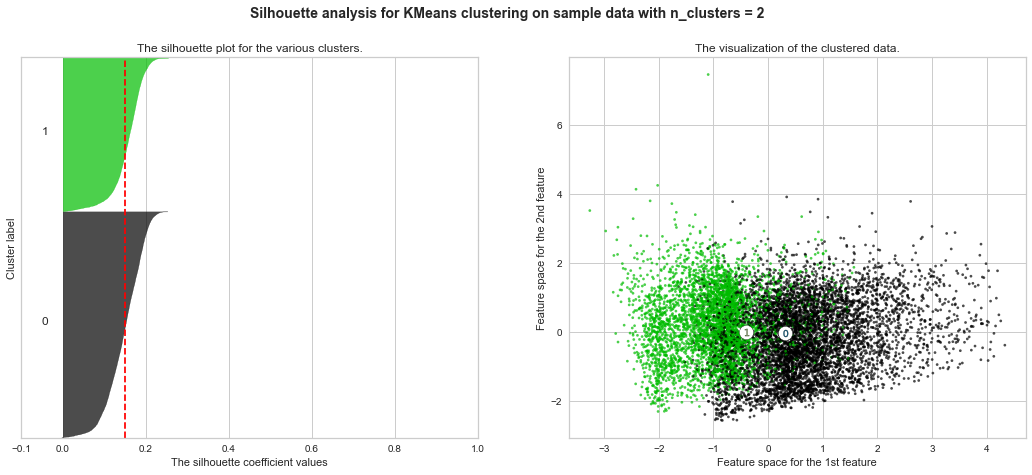

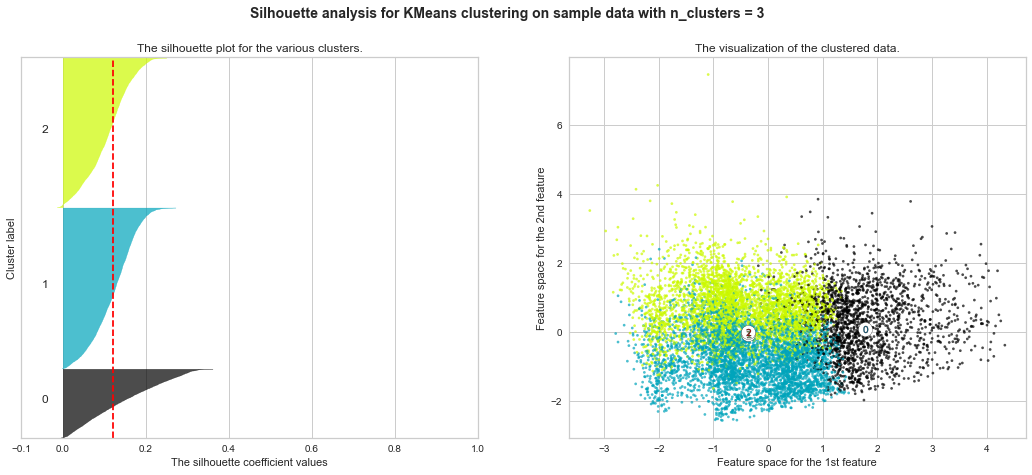

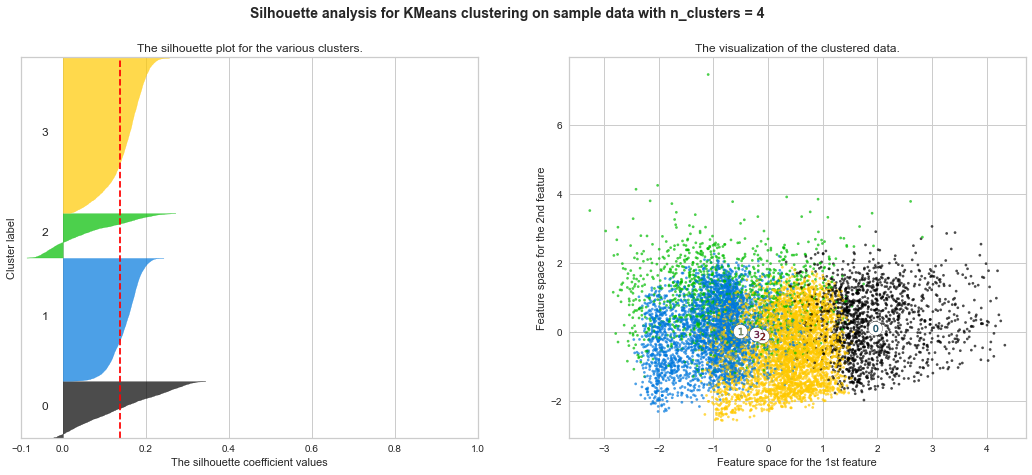

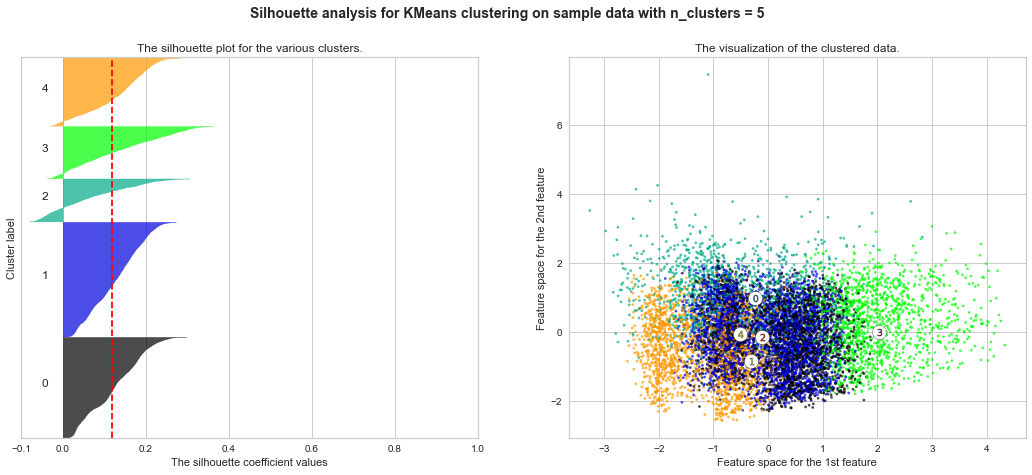

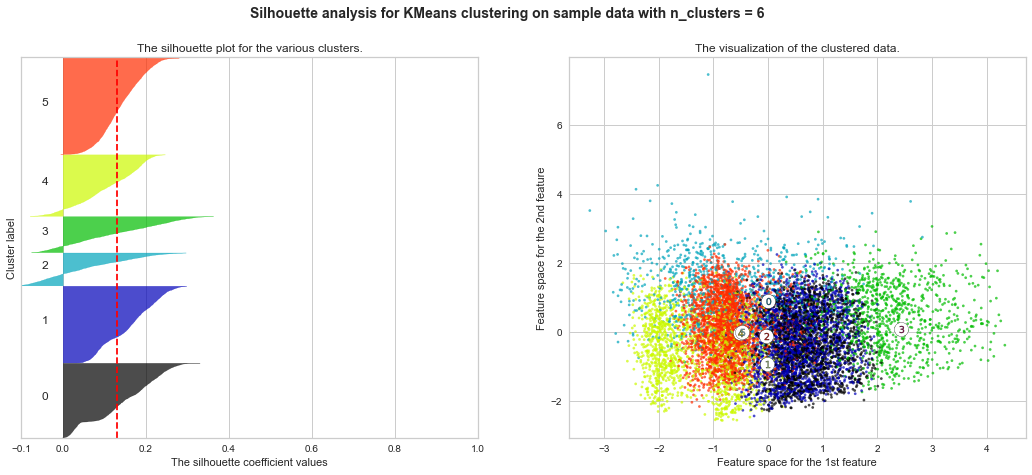

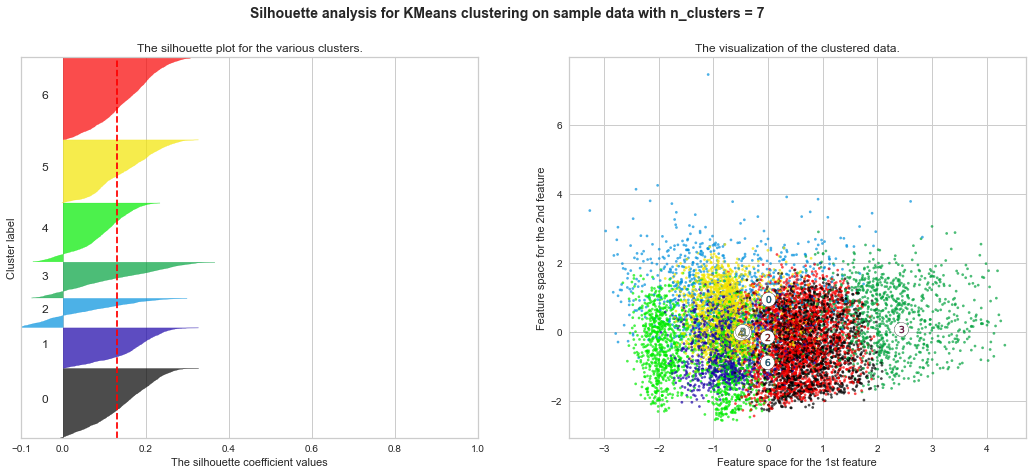

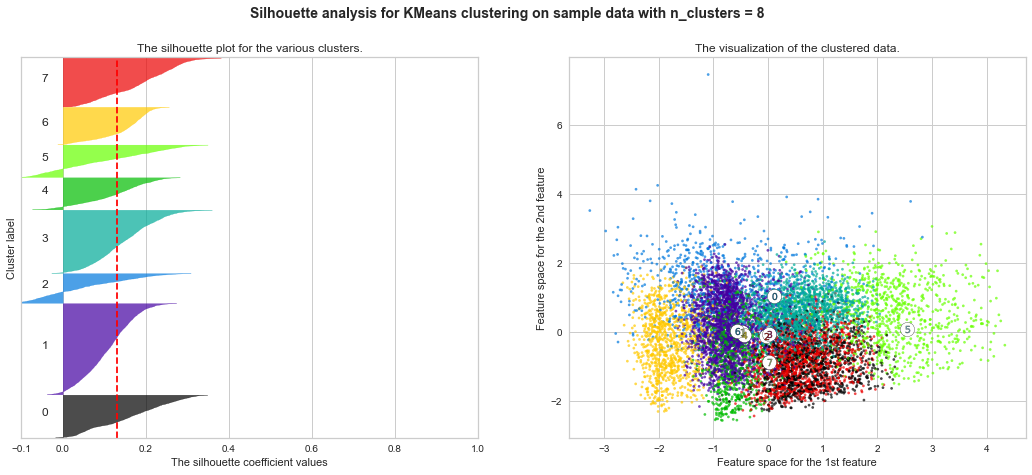

In [285]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
pca = PCA(n_components=2, random_state = 453)

for n_clusters in range_n_clusters:
    print(n_clusters)
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df.sample(10000, random_state = 42)) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(df.sample(10000, random_state = 42))

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df.sample(10000, random_state = 42), cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df.sample(10000, random_state = 42), cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    pca = PCA(n_components=2, random_state = 42)
    X_r = pca.fit(df.sample(10000, random_state = 42)).transform(df.sample(10000, random_state = 42))
    ax2.scatter(
        X_r[:, 0], X_r[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [286]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(data_scaled)

df_2['cluster_label'] = kmeans.labels_
df_2

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0         2425083    49125             1          2                 18   
1         2425083    49125             1          2                 18   
2         2425083    49125             1          2                 18   
3         2425083    49125             1          2                 18   
4         2425083    49125             1          2                 18   
...           ...      ...           ...        ...                ...   
2019496   3390742   199430            16          3                 18   
2019497    458285   128787            42          2                 19   
2019498    458285   128787            42          2                 19   
2019499    458285   128787            42          2                 19   
2019500    458285   128787            42          2                 19   

         days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                          -1.0          17                  1          0   
1                          -1.0          91                  2          0   
2                          -1.0          36                  3          0   
3                          -1.0          83                  4          0   
4                          -1.0          83                  5          0   
...                         ...         ...                ...        ...   
2019496                     5.0          83                  8          0   
2019497                     3.0         115                  1          1   
2019498                     3.0          32                  2          1   
2019499                     3.0          32                  3          1   
2019500                     3.0         123                  4          1   

         department_id  cluster_label  
0                   13              3  
1                   16              3  
2                   16              3  
3                    4              3  
4                    4              3  
...                ...            ...  
2019496              4              3  
2019497              7              4  
2019498              4              2  
2019499              4              2  
2019500              4              4  

[2019501 rows x 11 columns]

In [321]:
pca = PCA(n_components=2, random_state = 42)
X_r_2 = pd.DataFrame(pca.fit(df_2.drop(['order_id', 'user_id', 'cluster_label'], axis = 1).sample(10000,random_state = 42)).transform(df_2.drop(['order_id', 'user_id', 'cluster_label'], axis = 1).sample(10000,random_state = 42)))

<AxesSubplot:xlabel='0', ylabel='1'>

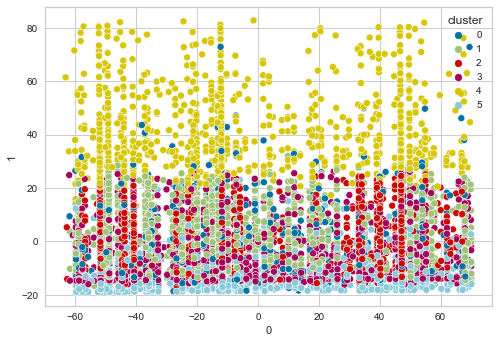

In [336]:
k_l = pd.DataFrame(kmeans.labels_).sample(10000,random_state = 42).T.to_numpy()[0]
X_r_2['cluster'] = pd.Categorical(k_l)
sns.scatterplot(x=0,y=1,hue="cluster",data=X_r_2)


In [319]:
pca = PCA(n_components=3, random_state = 42)
X_r_3 = pca.fit(df_2.drop(['order_id', 'user_id', 'cluster_label'] , axis = 1).sample(10000,random_state = 42)).transform(df_2.drop(['order_id', 'user_id', 'cluster_label'], axis = 1).sample(10000,random_state = 42))

In [ ]:
Scene = dict(xaxis = dict(title  = 'PCA first component -->'),yaxis = dict(title  = 'PCA second component--->'),zaxis = dict(title  = 'PCA third component-->'))

labels = kmeans.labels_
trace = go.Scatter3d(x=X_r_3[:, 0], y=X_r_3[:, 1], z=X_r_3[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [342]:
X_embedded = pd.DataFrame(TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(df_2.drop(['order_id', 'user_id', 'cluster_label'], axis = 1).sample(10000,random_state = 42)))

<AxesSubplot:xlabel='0', ylabel='1'>

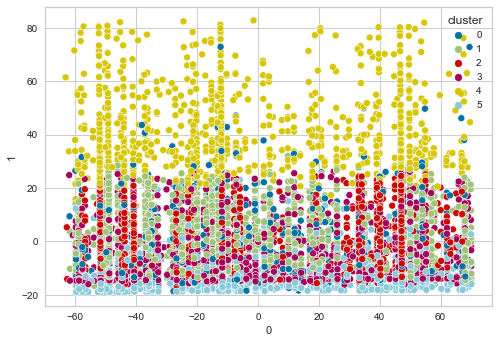

In [343]:
k_l = pd.DataFrame(kmeans.labels_).sample(10000,random_state = 42).T.to_numpy()[0]
X_embedded['cluster'] = pd.Categorical(k_l)
sns.scatterplot(x=0,y=1,hue="cluster",data=X_r_2)


In [344]:
X_embedded_3 = TSNE(n_components=3, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(df_2.drop(['order_id', 'user_id', 'cluster_label'], axis = 1).sample(10000,random_state = 42))

In [ ]:
Scene = dict(xaxis = dict(title  = 'TSNE first component -->'),yaxis = dict(title  = 'TSNE second component--->'),zaxis = dict(title  = 'TSNE third component-->'))

labels = kmeans.labels_
trace = go.Scatter3d(x=X_embedded_3[:, 0], y=X_embedded_3[:, 1], z=X_embedded_3[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [377]:
dbscan = DBSCAN(eps = 2, min_samples = 20).fit(pd.DataFrame(data_scaled).sample(10000,random_state = 42)) 


<AxesSubplot:xlabel='0', ylabel='1'>

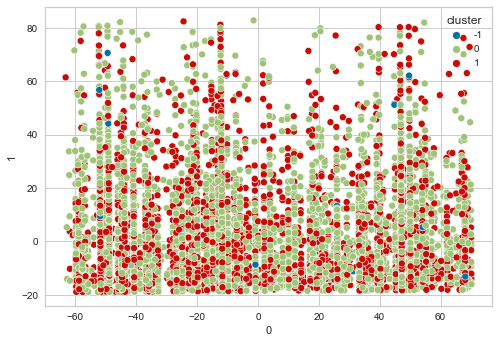

In [378]:
d_l = pd.DataFrame(dbscan.labels_).sample(10000,random_state = 42).T.to_numpy()[0]
X_r_2['cluster'] = pd.Categorical(d_l)
sns.scatterplot(x=0,y=1,hue="cluster",data=X_r_2)


In [ ]:
Scene = dict(xaxis = dict(title  = 'PCA first component -->'),yaxis = dict(title  = 'PCA second component--->'),zaxis = dict(title  = 'PCA third component-->'))

labels = dbscan.labels_
trace = go.Scatter3d(x=X_r_3[:, 0], y=X_r_3[:, 1], z=X_r_3[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

2
For n_clusters = 2 The average silhouette_score is : 0.10918948535752925
3
For n_clusters = 3 The average silhouette_score is : 0.12280406461958733
4
For n_clusters = 4 The average silhouette_score is : 0.1267535771178827
5
For n_clusters = 5 The average silhouette_score is : 0.11987814209818298
6
For n_clusters = 6 The average silhouette_score is : 0.11034186873611838
7
For n_clusters = 7 The average silhouette_score is : 0.09610724564775487
8
For n_clusters = 8 The average silhouette_score is : 0.10211262067760492


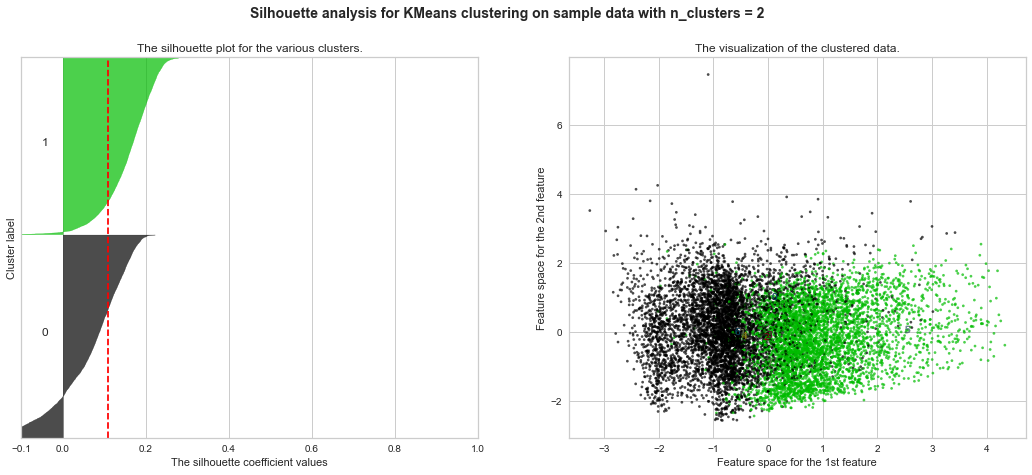

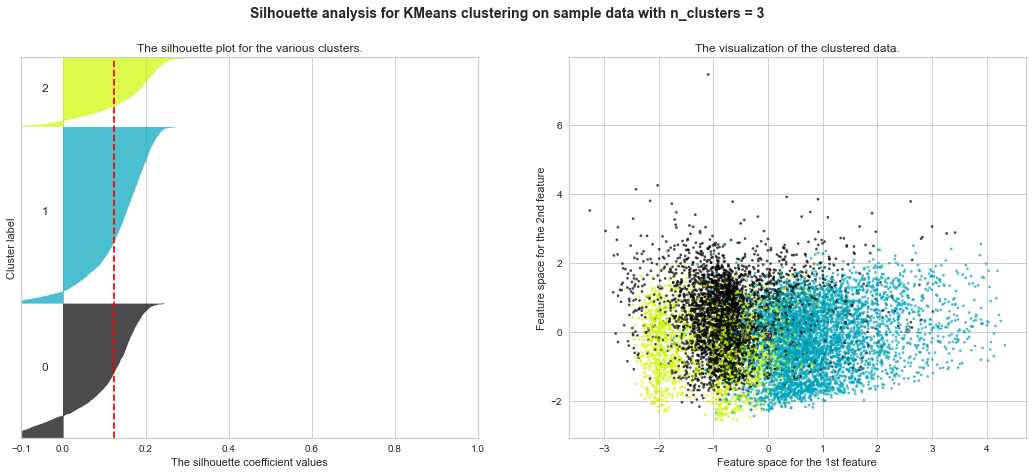

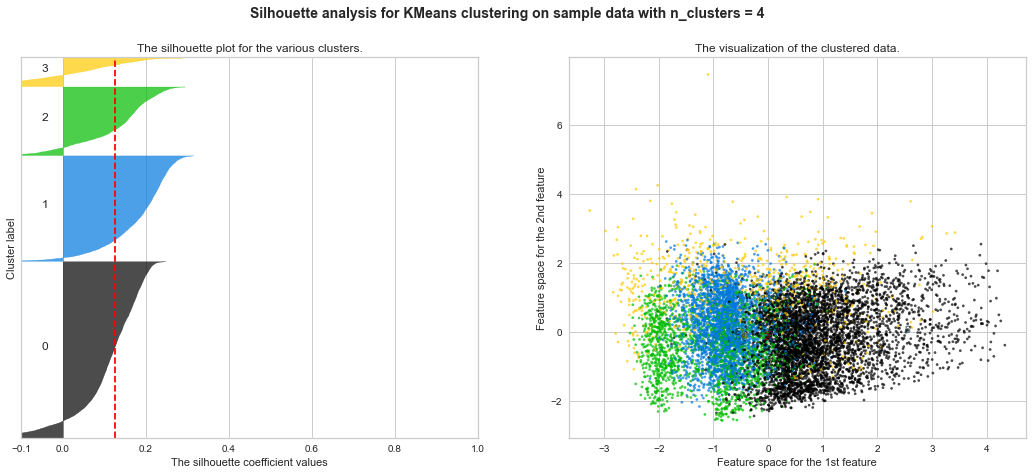

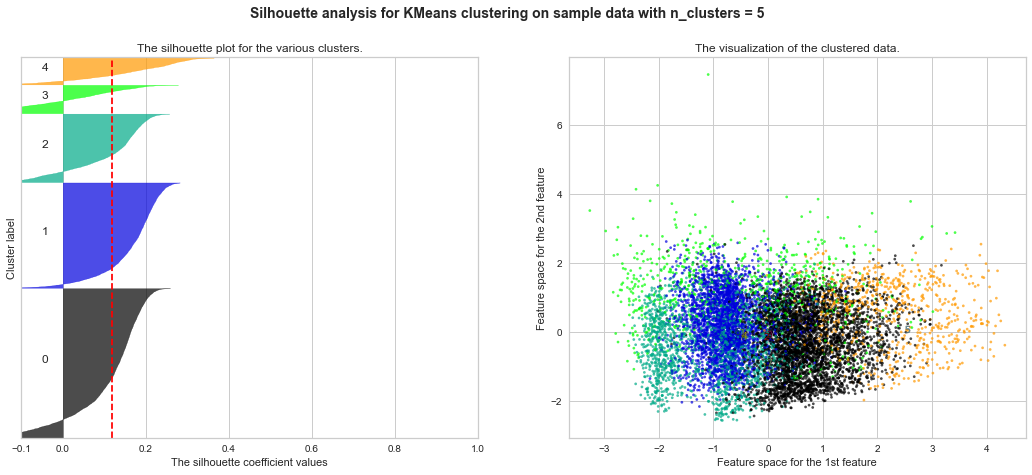

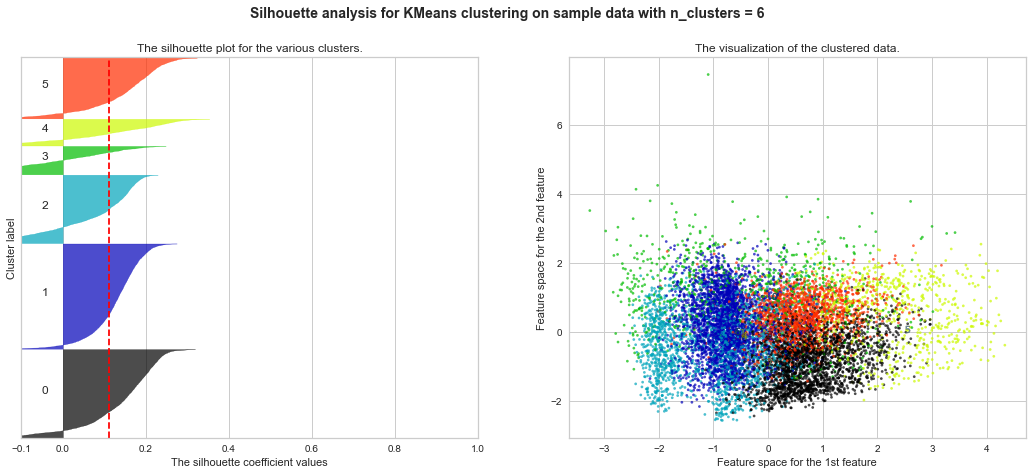

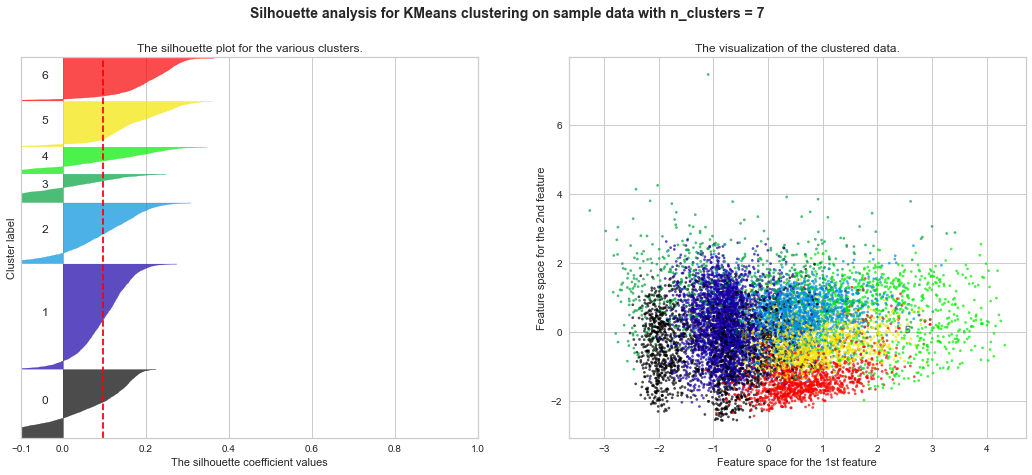

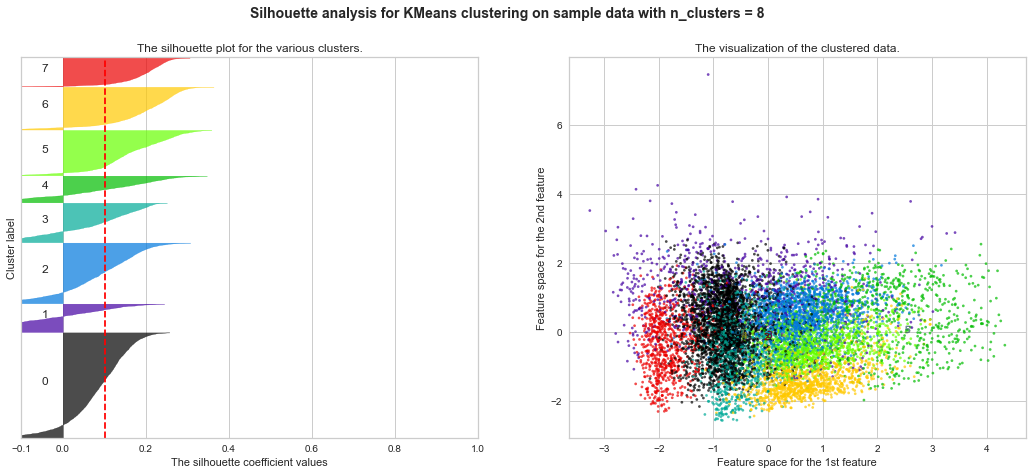

In [385]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
pca = PCA(n_components=2, random_state = 453)

for n_clusters in range_n_clusters:
    print(n_clusters)
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df.sample(10000, random_state = 42)) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(df.sample(10000, random_state = 42))

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df.sample(10000, random_state = 42), cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df.sample(10000, random_state = 42), cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    pca = PCA(n_components=2, random_state = 42)
    X_r = pca.fit(df.sample(10000, random_state = 42)).transform(df.sample(10000, random_state = 42))
    ax2.scatter(
        X_r[:, 0], X_r[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters


    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [386]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')


In [389]:
labels = hierarchical_cluster.fit_predict(pd.DataFrame(data_scaled).sample(10000, random_state = 42)) 

<AxesSubplot:xlabel='0', ylabel='1'>

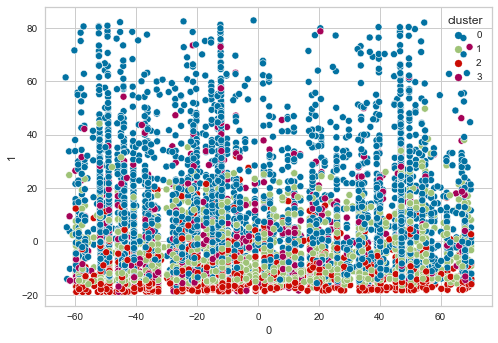

In [390]:
d_l = labels
X_r_2['cluster'] = pd.Categorical(d_l)
sns.scatterplot(x=0,y=1,hue="cluster",data=X_r_2)

In [ ]:
Scene = dict(xaxis = dict(title  = 'PCA first component -->'),yaxis = dict(title  = 'PCA second component--->'),zaxis = dict(title  = 'PCA third component-->'))

labels = labels
trace = go.Scatter3d(x=X_r_3[:, 0], y=X_r_3[:, 1], z=X_r_3[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

PCA

Total Variance in our dataset is:  1964.546891607738
The 97.5% variance we want to have is:  1915.4332193175444

Variance explain with 2 n_compononets:  1774.5638183246451
Variance explain with 3 n_compononets:  1851.8946822628907
Variance explain with 4 n_compononets:  1902.82993551372
Variance explain with 5 n_compononets:  1942.0040475183946
Variance explain with 6 n_compononets:  1959.9533271989944


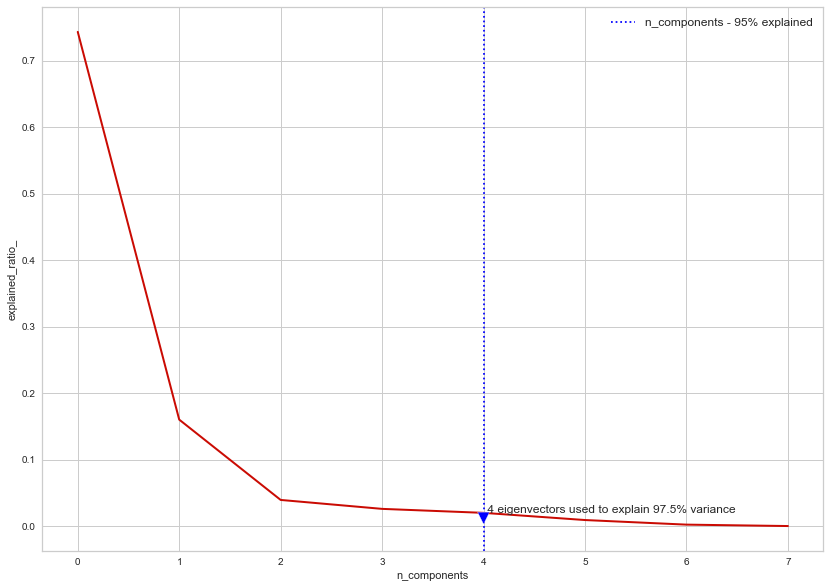

In [404]:
n_components = df_2.drop(['order_id', 'user_id', 'cluster_label'], axis = 1).shape[1]

# RUNNING PCA WITH ALL COMPONENTS
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(df_2.drop(['order_id', 'user_id', 'cluster_label'], axis = 1)).transform(df_2.drop(['order_id', 'user_id', 'cluster_label'], axis = 1))

# CALCULATING THE 97.5% VARIANCE
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_97 = total_variance * 0.975
print("The 97.5% variance we want to have is: ", var_97)
print("")

# CREATING A DF WITH THE COMPONENTS & EXPLAINED VARIANCE
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# TRYING TO HIT 95% VARIANCE
print("Variance explain with 2 n_compononets: ", sum(a["Explained Variance"][0:2]))
print("Variance explain with 3 n_compononets: ", sum(a["Explained Variance"][0:3]))
print("Variance explain with 4 n_compononets: ", sum(a["Explained Variance"][0:4]))
print("Variance explain with 5 n_compononets: ", sum(a["Explained Variance"][0:5]))
print("Variance explain with 6 n_compononets: ", sum(a["Explained Variance"][0:6]))



# PLOTTING DATA POINTS
plt.figure(1, figsize=(14, 10))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# PLOTTING LINE WITH 95% E.V.
plt.axvline(4,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# ADDING ARROW POINTER
plt.annotate(' 4 eigenvectors used to explain 97.5% variance', xy=(4, pca.explained_variance_ratio_[6]), 
             xytext=(4, pca.explained_variance_ratio_[4]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

The innertia for : 2 Clusters is: 1491151951.713834
The innertia for : 3 Clusters is: 1116452168.0819507
The innertia for : 4 Clusters is: 890504650.6519576
The innertia for : 5 Clusters is: 734022269.7903297
The innertia for : 6 Clusters is: 647126827.4306979
The innertia for : 7 Clusters is: 592301231.9017032
The innertia for : 8 Clusters is: 551065283.5907304


Text(0.5, 1.0, 'Inertia Plot per k')

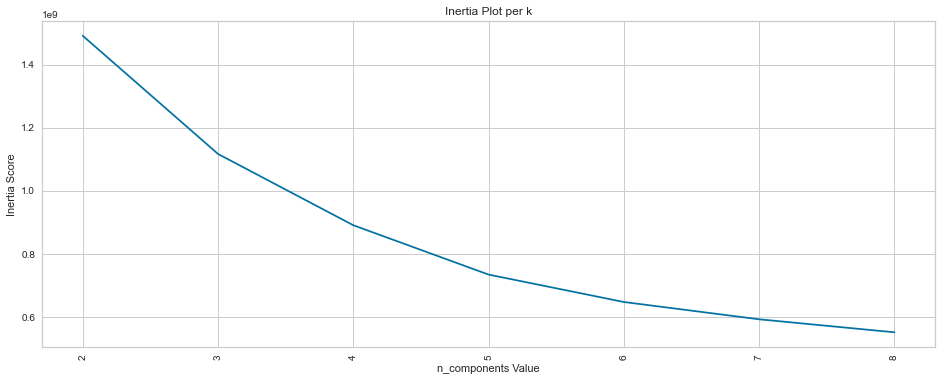

In [418]:
# RUNNING PCA AGAIN WITH 4 COMPONENTS
pca = PCA(n_components=4, random_state = 453)
X_r = pd.DataFrame(pca.fit(df_2.drop(['order_id', 'user_id', 'cluster_label'], axis = 1)).transform(df_2.drop(['order_id', 'user_id', 'cluster_label'], axis = 1)))

inertia = []

# RUNNING K-MEANS
for f in range_n_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# CREATING SCREE PLOT TO VISUALIZE INERTIA - ELBOW METHOD
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(range_n_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(range_n_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

2
For n_clusters = 2 The average silhouette_score is : 0.47781916291953186
3
For n_clusters = 3 The average silhouette_score is : 0.35867219311250054
4
For n_clusters = 4 The average silhouette_score is : 0.381245321066568
5
For n_clusters = 5 The average silhouette_score is : 0.3314346532277958
6
For n_clusters = 6 The average silhouette_score is : 0.3437148412088858
7
For n_clusters = 7 The average silhouette_score is : 0.33168084886091503
8
For n_clusters = 8 The average silhouette_score is : 0.32222575183157603


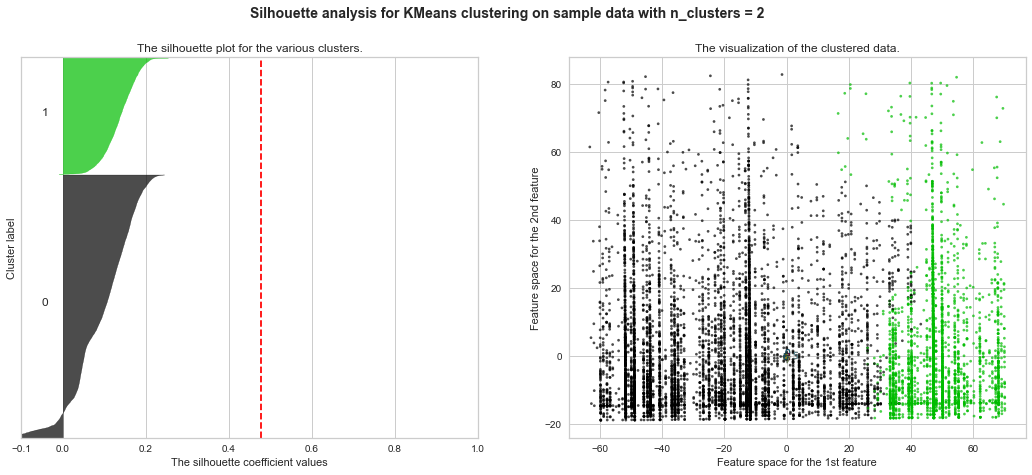

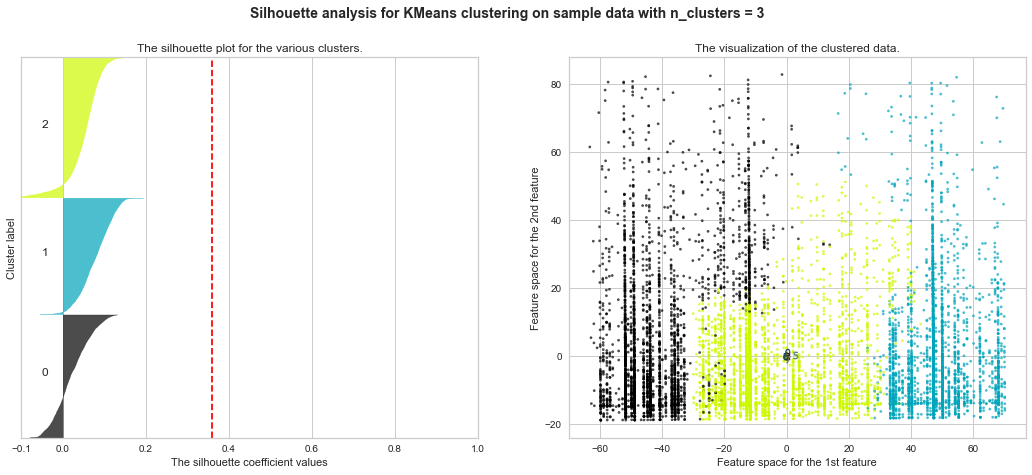

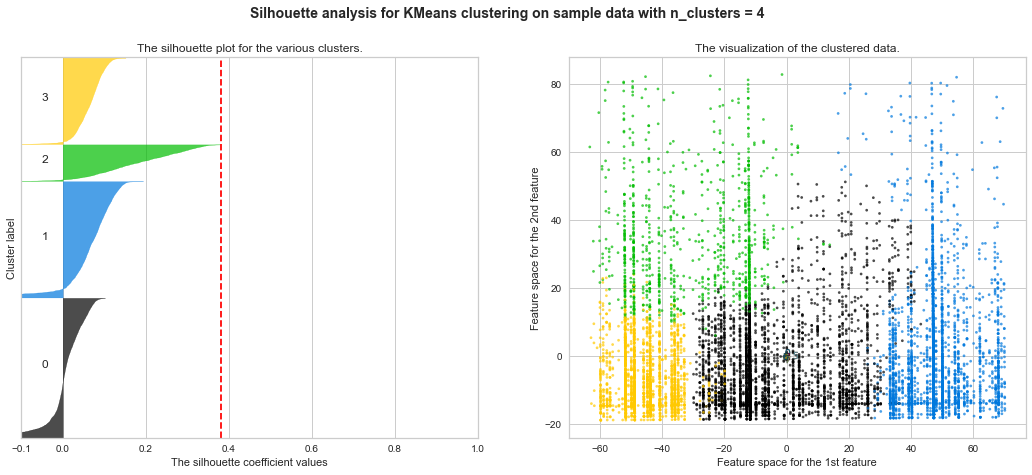

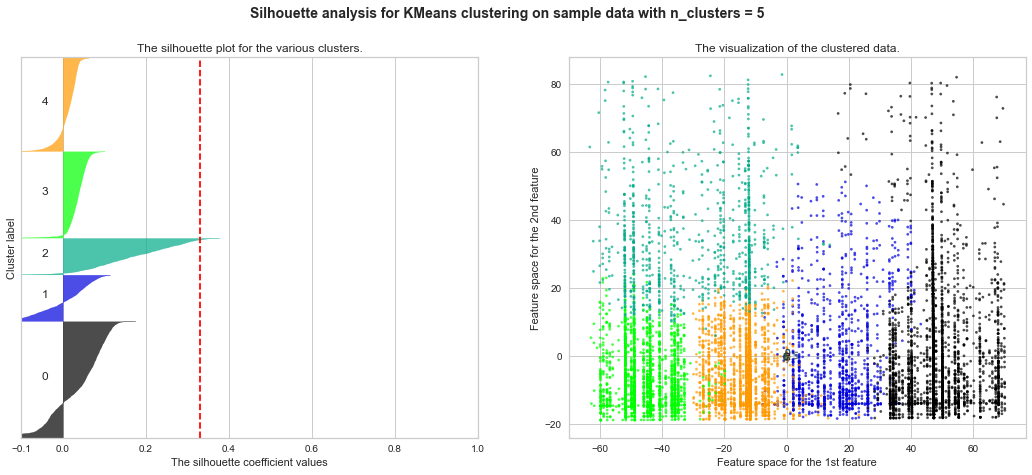

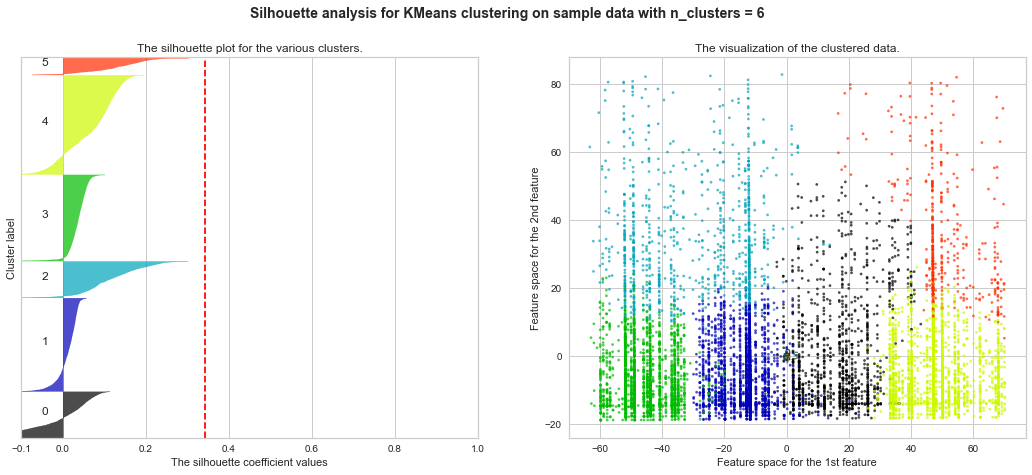

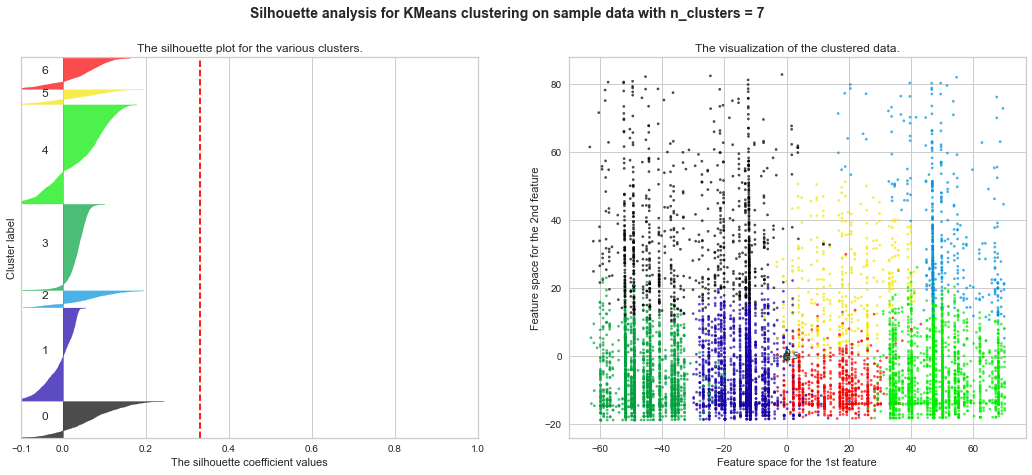

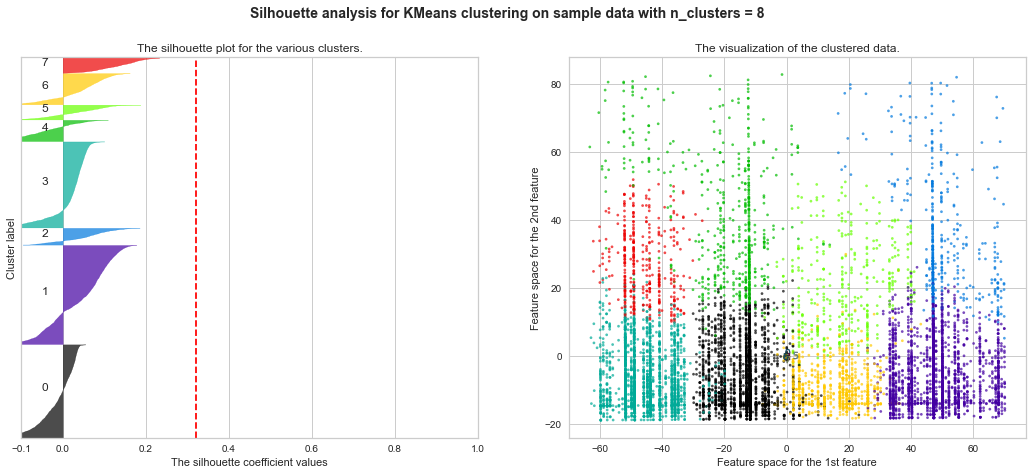

In [419]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
pca = PCA(n_components=2, random_state = 42)

for n_clusters in range_n_clusters:
    print(n_clusters)
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_r.sample(10000, random_state = 42)) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(X_r.sample(10000, random_state = 42))

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_r.sample(10000, random_state = 42), cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df.sample(10000, random_state = 42), cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    pca = PCA(n_components=2, random_state = 42)
    X_t = pca.fit(X_r.sample(10000, random_state = 42)).transform(X_r.sample(10000, random_state = 42))
    ax2.scatter(
        X_t[:, 0], X_t[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters


    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [420]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_r)

X_r['cluster_label'] = kmeans.labels_
X_r

0          1          2         3  cluster_label
0        54.199176 -13.884012 -14.966804 -5.247756              1
1       -19.829677 -13.873439 -14.950353 -4.119433              0
2        35.165574 -13.883655 -14.751242 -2.989527              1
3       -11.707375 -13.887042 -14.785448 -3.457016              0
4       -11.708975 -13.889250 -14.672127 -2.469837              0
...            ...        ...        ...       ...            ...
2019496 -11.722948  -0.189753  -5.838578 -0.451514              0
2019497 -43.741113  25.771788  -4.053644 -7.376603              3
2019498  39.284024  25.755489  -3.829414 -6.507211              1
2019499  39.282424  25.753281  -3.716092 -5.520032              1
2019500 -51.713965  25.764325  -3.744712 -4.769000              2

[2019501 rows x 5 columns]

In [421]:
pca = PCA(n_components=2, random_state = 42)
X_r_2 = pd.DataFrame(pca.fit(df_2.drop(['order_id', 'user_id', 'cluster_label'], axis = 1).sample(10000,random_state = 42)).transform(df_2.drop(['order_id', 'user_id', 'cluster_label'], axis = 1).sample(10000,random_state = 42)))

<AxesSubplot:xlabel='0', ylabel='1'>

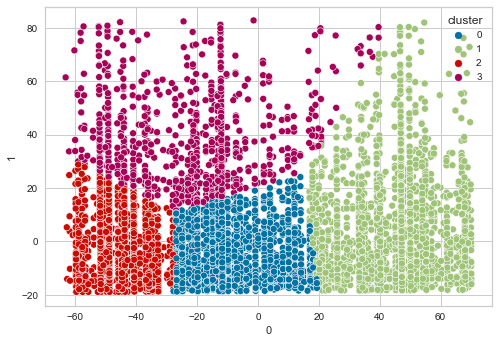

In [422]:
k_l = pd.DataFrame(kmeans.labels_).sample(10000,random_state = 42).T.to_numpy()[0]
X_r_2['cluster'] = pd.Categorical(k_l)
sns.scatterplot(x=0,y=1,hue="cluster",data=X_r_2)


In [423]:
pca = PCA(n_components=3, random_state = 42)
X_r_3 = pca.fit(df_2.drop(['order_id', 'user_id', 'cluster_label'] , axis = 1).sample(10000,random_state = 42)).transform(df_2.drop(['order_id', 'user_id', 'cluster_label'], axis = 1).sample(10000,random_state = 42))

In [ ]:
Scene = dict(xaxis = dict(title  = 'PCA first component -->'),yaxis = dict(title  = 'PCA second component--->'),zaxis = dict(title  = 'PCA third component-->'))

labels = kmeans.labels_
trace = go.Scatter3d(x=X_r_3[:, 0], y=X_r_3[:, 1], z=X_r_3[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()